<div style="float:left;"><img src="files/logo.png" alt="alt text" title="image Title" width="250"/></div>


# <center>Analysez les ventes d'une librairie avec R ou Python</center>

# Sommaire :

**Partie 6: Analyse des corrélations**
- <a href="#C11">1.Le lien entre le genre d’un client et les catégories des livres achetés</a>
- <a href="#C12">2.Analyse de la corrélation entre le montant total et l'âge</a>
- <a href="#C13">3.Analyse de la corrélation entre les catégories des livres et l'âge</a>
- <a href="#C14">4.Le lien entre l’âge des clients et la taille du panier moyen</a>
- <a href="#C15">5.Le lien entre l’âge des clients et la fréquence d'achat</a>


In [80]:
# Import des librairies.
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import re
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import datetime

In [81]:
# Chargement des données
df_B_to_C = pd.read_csv("df_B_to_C.csv")
df_B_to_C.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,Year,month,day,age
0,c_4410,f,1967-01-01,0_1316,2021-12-29,s_141762,7.2,0,2021,12,29,55
1,c_4410,f,1967-01-01,0_1316,2022-03-29,s_186233,7.2,0,2022,3,29,55
2,c_4410,f,1967-01-01,0_1316,2022-05-29,s_215758,7.2,0,2022,5,29,55
3,c_3654,f,1978-01-01,0_1316,2021-11-26,s_125143,7.2,0,2021,11,26,44
4,c_3654,f,1978-01-01,0_1316,2022-08-26,s_258546,7.2,0,2022,8,26,44


## Partie 6: Analyse des corrélations
## <a name="C11">1.Le lien entre le genre d’un client et les catégories des livres achetés</a>

Question : Est-ce qu’il y a une relation entre les catégories des livres et le genre d’un client?<br>
Variable expliquée : les catégories des livres<br>
Variable explicative : le genre<br>
Le genre d'un client et la catégorie des produits sont deux variables qualitatives. On va analyser ces deux variables avec le test khi-deux d'indépendance.
Le test d’indépendance du chi carré est un test non paramétrique. En d’autres termes, l’hypothèse de normalité n’est pas nécessaire pour effectuer le test.

L'idée de base de ce test est de comparer les valeurs observées dans les données aux valeurs attendues si l'hypothèse nulle est vraie. Le test statistique implique de trouver la différence au carré entre les valeurs de données observées et attendues, et de diviser cette différence par les valeurs de données attendues. On fait après la somme de ces valeurs, c'est la statistique de test.

Ensuite, on compare la statistique de test à la valeur théorique à partir de la distribution khi-deux. La valeur théorique dépend à la fois de la valeur alpha et des degrés de liberté des données.

In [82]:
# Créer un  TCD: Données observées
df_count = pd.crosstab(df_B_to_C.sex, df_B_to_C.categ)
df_count

categ,0,1,2
sex,,,
f,206220,114899,17283
m,209281,112188,19200


On pose les hypothèses de départ :

H0 : Variables indépendantes si p-value > 5%<br>
H1 : Variables non indépendantes si p-value < 5%<br>

#### 1.Trouver la valeur critique en trois étapes.

1- Trouver le degré de liberté: il faut trouver les valeurs dépendantes dans les lignes et colonnes du tableau. Pour les lignes il y a 2-1 = 1 variable indépendante, et pour les colonnes il y a 3-1 = 2 variables indépendantes. Ce qui conduit à 2 x 1 = 2 degrés de liberté.<br>

2- Choisir le risque de se tromper : On choisit un seuil de 5 %. C'est le seuil de rejeter à tort l'hypothèse nulle.<br>
3- Trouver la valeur critique dans la table de distribution du Khi2.


<div style="float:left;"><img src="files/tableauKhi2.png" alt="alt text" title="image Title" width="500"/></div>

#### 2.Calcul de Khi-deux

In [83]:

from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
print("Le Khi_2 calculé est:", Khi2_obs, "\n Le p_value est", p_value, ddl,"\n Les effectifs théoriques sont:\n", effectif_theorique)

Le Khi_2 calculé est: 148.0770961500028 
 Le p_value est 7.005951441770124e-33 2 
 Les effectifs théoriques sont:
 [[207056.94898177 113164.44815638  18180.60286185]
 [208444.05101823 113922.55184362  18302.39713815]]


On déduit : le Khi-deux calculé ˃> Khi-deux critique. La p-valeur est bien inférieur à 5%. On peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes avec un risque de 0.05.<br>
Donc on accepte l'hypothèse alternative (H1), qu'il existe un lien entre le genre d’un client et les catégories des livres achetés et on refuse l'hypothèse nulle (H0).


 <div class="alert alert-block alert-info">
    <b>Le genre d'un client et la catégorie de produit sont deux variables non indépendantes avec un intervalle de confiance egal à 5%       
     </b>
</div> 


## <a name="C12">2. Analyse de la corrélation entre le montant total et l'âge</a>

Le montant total et l'âge sont deux variables quantitatives.<br>
Comme pour les variables catégorielles, il existe des tests pour déterminer si deux variables continues sont indépendantes.<br>
Corrélation paramétrique – corrélation de Pearson (r) : Elle mesure une dépendance linéaire entre deux variables (x et y) est connue sous le nom de test de corrélation paramétrique car elle dépend de la distribution des données.<br>
Corrélation non paramétrique – Kendall(tau) et Spearman(rho) : ce sont des coefficients de corrélation basés sur le rang, connus sous le nom de corrélation non paramétrique.
.<br>

###  Etape(1): Les données à étudier


In [84]:
# Scission des données selon age
montant_par_age = df_B_to_C.groupby("age")
# Montant par age
montant_par_age = montant_par_age['price'].agg([pd.Series.sum])
montant_par_age = montant_par_age.reset_index().rename(columns = {'sum':'CA_age'})
# Affichage
montant_par_age.head()


,age,CA_age
0,18,609013.690000
1,19,178195.780000
2,20,184209.264564
3,21,178497.700000
4,22,165029.256376


### Etape(2): Visualisation des données 

<AxesSubplot:>

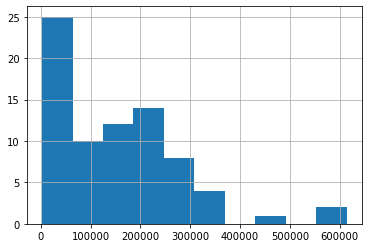

In [85]:
# Histogramme de la variable CA_age
montant_par_age['CA_age'].hist()

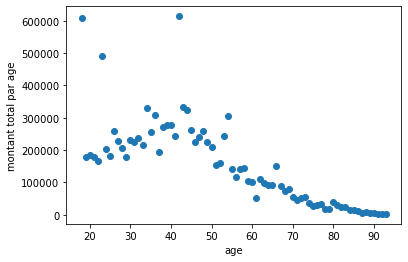

In [86]:
# Le diagramme de dispersion
plt.plot(montant_par_age["age"],montant_par_age["CA_age"],'o')
plt.xlabel("age")
plt.ylabel("montant total par age")
plt.show()

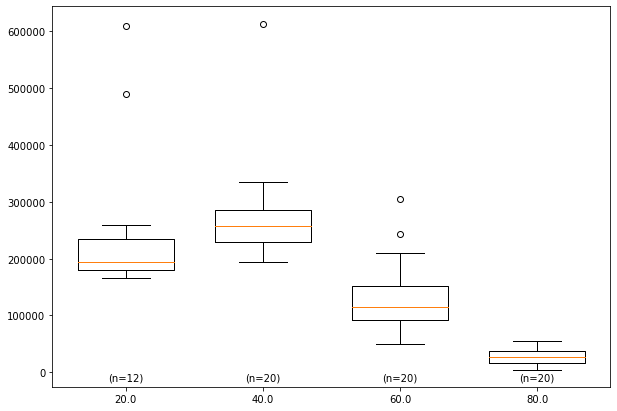

In [87]:
# Boites à moustaches
taille_classe = 20 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au age maximum par paliers de taille taille_classe
tranches = np.arange(0, max(montant_par_age["age"]), taille_classe)
tranches += int(taille_classe/2) # on décale les tranches d'une demi taille de classe
indices = np.digitize(montant_par_age["age"], tranches) # associe chaque age à son numéro de classe
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montants = montant_par_age.loc[indices==ind,"CA_age"] # sélection des individus de la tranche ind
    if len(montants) > 0:
        g = {
            'valeurs': montants,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montants),
            'quartiles': [np.percentile(montants,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= True, # on prend en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

### Etape(3): Test de normalité 
Hypothèse nulle H0: l’échantillon est issu d’une population normalement distribuée.<br>
Hypothèse nulle H1 l’échantillon n'est pas issu d’une population normalement distribuée.<br>

In [88]:
# Créer un sous-échantillon
echantillon = montant_par_age.sample(50)
# perform Shapiro-Wilk test
shapiro(echantillon["CA_age"])

ShapiroResult(statistic=0.8665079474449158, pvalue=4.4685886678053066e-05)

Wobs < W0.05<br>
pvalue << 0.05 on rejette l'hypothèse nulle.

La distribution de la variable CA_age n'est pas gaussienne , et la relation entre les variables ne semble pas  être affine.
On a fait le choix de faire un test de corrélation non paramétrique (test de Spearman). 
La corrélation de Spearman est étudiée lorsque deux variables statistiques semblent être corrélées sans que la relation entre les deux variables soit de type affine.

### Etape(4): Test de corrélation de Spearman 

In [91]:
from scipy.stats import spearmanr
#extract Spearman Rank correlation coefficient
coeff = spearmanr(montant_par_age['age'], montant_par_age['CA_age'])[0]
print('Le coefficient de Spearman est:', coeff)

Le coefficient de Spearman est: -0.8576076555023923


In [92]:
#extract p-value of Spearman Rank correlation coefficient
p_value = spearmanr(montant_par_age['age'], montant_par_age['CA_age'])[1] 
print('La p-valeur est',p_value)

La p-valeur est 4.57972879340901e-23


 <div class="alert alert-block alert-info">
La p-valeur est inférieur à 5%. On en déduit que les variables ne sont pas indépendantes.<br>
Il existe une association statistiquement significative entre l'âge et le montant total par âge.<br>
    
Le coefficient de Spearman permet de mesurer le niveau de corrélation entre les deux variables. Il renvoie une valeur entre -1 et 1. S’il est proche de 1 cela signifie que les variables sont corrélées, proche de 0 que les variables sont décorrélées et proche de -1 qu’elles sont corrélées négativement.<br>
    
Dans notre exemple, le coefficient a une valeur de -0.8576 ce qui signifie que les variables sont corrélées négativement.
</div> 


###  Etape(5): Identification des outliers

In [93]:
# Trouver le 1er quartile
q1 = np.quantile(montant_par_age['CA_age'], 0.25)

# Trouver le 3éme quartile
q3 = np.quantile(montant_par_age['CA_age'], 0.75)
# Calculer le iqr
iqr = q3-q1
 
# Calculer upper and lower moustaches
limite_sup = q3+(1.5*iqr)
limite_inf = q1-(1.5*iqr)
print('Le IQR est' , round(iqr,2), '\n La limite supérieur est:', round(limite_sup,2), '\n La limite inférieur est:', round(limite_inf,2))

Le IQR est 192809.42 
 La limite supérieur est: 521080.73 
 La limite inférieur est: -250156.97


In [94]:
# Nombre de outliers
print('Les outliers sont en nombre de:',np.sum(montant_par_age['CA_age'] > limite_sup))

Les outliers sont en nombre de: 2


In [95]:
# Lister les outliers
outliers = montant_par_age['CA_age'][(montant_par_age['CA_age'] >= limite_sup)]
print('Les outliers sont:\n',outliers)

Les outliers sont:
 0     609013.690000
24    613657.132752
Name: CA_age, dtype: float64


In [96]:
# Créer une DataFrame sans outliers
df_non_outliers = montant_par_age.loc[(montant_par_age['CA_age'] > limite_inf) &  (montant_par_age['CA_age'] < limite_sup),:]

###  Etape(6): Effectuer une régression polynomiale


On va essayer d'ajuster un modèle de régression polynomiale en utilisant l'âge comme variable explicative et le chiffre d'affaires comme variable de réponse.

In [97]:
#Définir la variable à expliquer
y1 = df_non_outliers['CA_age']

#Définir la variable explicative
x1 = df_non_outliers['age']

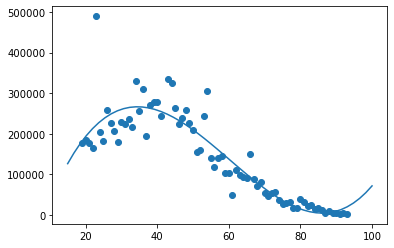

In [98]:
#polynomial fit with degree = 3
model = np.poly1d(np.polyfit(x1 , y1, 3))

#add fitted polynomial line to scatterplot
polyline = np.linspace(15, 100, 50)
plt.scatter(x1, y1)
plt.plot(polyline, model(polyline))
plt.show()


In [99]:
print(model)

       3         2
3.805 x - 688.3 x + 3.39e+04 x - 2.399e+05


In [100]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(x1, y1, 3)

{'r_squared': 0.8123301433599707}

 <div class="alert alert-block alert-info">
 
Étant donné que la valeur est nettement inférieure à 0,05, nous pouvons dire qu'il existe une association statistiquement significative entre l'âge et le montant total par âge.

R-squared :  En général, plus la valeur R au carré d'un modèle de régression est élevée, plus les variables explicatives sont capables de prédire la valeur de la variable de réponse. Dans ce cas, 81 % de la variation du chiffre d'affaires s'expliquent par l'âge du client.      
     
</div>




### <a name="C13">3.Analyser la corrélation entre les catégories des livres et l'âge</a>

### 1-Visualisation de l'influence en affichant les boîtes à moustaches 

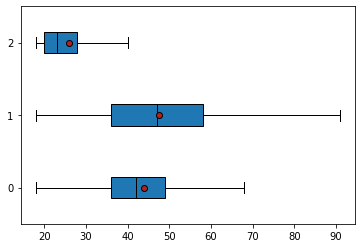

In [101]:
X = "categ" # qualitative
Y = "age" # quantitative
modalites = df_B_to_C['categ'].unique()
groupes = []
for m in modalites:
    groupes.append(df_B_to_C[df_B_to_C['categ'] == m][Y])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes,labels = modalites,  showfliers = False, medianprops = medianprops, 
            vert = False, patch_artist = True, showmeans= True, meanprops = meanprops)
plt.show()

Il semble qu'il y ait des différences distinctes entre les trois groupes. Effectuons donc un test ANOVA pour prouver si c'est le cas.<br>
Les boxplots de certains groupes étant plus étendus que d’autres, cela laisse penser que les résidus ne seront probablement pas homogènes. De plus, la présence d’outliers dans les groupes laisse également envisager un défaut de normalité des résidus.

### 2- Calcul du rapport de corrélation

 Définition : Le rapport de corrélation est la part de variations de Y expliquée par X dans la variation totale de Y. 

In [102]:
 # Un indicateur de liaison : le rapport de corrélation
X = "categ" # qualitative
Y = "age" # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_B_to_C['categ'],df_B_to_C
            ['age'])

0.11904305510407029

### 3- Réaliser une analyse de la variance ANOVA

ANOVA "Analyse de la variance" teste une différence globale entre tous les groupes. L'ANOVA unidirectionnelle, également appelée ANOVA à un facteur, est un test paramétrique utilisé pour tester une différence statistiquement significative d'un résultat entre 3 groupes ou plus. Comme pour tous les tests paramétriques, certaines conditions doivent être remplies pour que les résultats du test soient considérés comme fiables.

Une statistique F est un rapport de deux quantités qui devraient être à peu près égales selon l’hypothèse nulle, qui produit une statistique F d’environ 1. 
L'ANOVA utilise le test F pour déterminer si la variabilité entre les moyens de groupe est plus grande que la variabilité des observations à l’intérieur des groupes. Si ce rapport est suffisamment élevé, On peut conclure que toutes les moyennes ne sont pas égales.


### 4- Créer un sous-échantillon :
On fait un plan d'expérience complet( ∀i∈{1,…,3}:ni>0) et équilibré (n1=n2=n3=100)  :


In [103]:
df_subset_categ0 = df_B_to_C.loc[df_B_to_C['categ']==0]
df_subset_categ0 =df_subset_categ0.sample(n=100)
df_subset_categ0


,client_id,sex,birth,id_prod,date,session_id,price,categ,Year,month,day,age
16531,c_214,f,1960-01-01,0_1426,2022-12-02,s_305861,13.44,0,2022,12,2,62
92723,c_6909,m,1981-01-01,0_1505,2022-07-10,s_236169,14.99,0,2022,7,10,41
534543,c_3384,f,1973-01-01,0_1015,2022-10-19,s_284956,10.99,0,2022,10,19,49
152153,c_1609,m,1980-01-01,0_1623,2021-07-05,s_58284,7.99,0,2021,7,5,42
149867,c_247,m,1988-01-01,0_1621,2022-12-27,s_318264,17.99,0,2022,12,27,34
...,...,...,...,...,...,...,...,...,...,...,...,...
664588,c_5279,f,1984-01-01,0_1615,2022-06-24,s_228605,1.99,0,2022,6,24,38
253082,c_5413,f,1979-01-01,0_1617,2021-12-02,s_128207,11.99,0,2021,12,2,43
194285,c_1609,m,1980-01-01,0_1464,2022-09-13,s_267570,8.27,0,2022,9,13,42
662737,c_8252,f,1989-01-01,0_135,2022-02-25,s_170635,12.99,0,2022,2,25,33


In [104]:
df_subset_categ1 = df_B_to_C.loc[df_B_to_C['categ']==1]
df_subset_categ1 =df_subset_categ1.sample(n=100)
df_subset_categ1

,client_id,sex,birth,id_prod,date,session_id,price,categ,Year,month,day,age
353101,c_747,f,1986-01-01,1_370,2021-03-14,s_6088,13.11,1,2021,3,14,36
370365,c_5338,m,1963-01-01,1_475,2021-05-16,s_35366,20.99,1,2021,5,16,59
400242,c_6201,f,1960-01-01,1_288,2022-01-18,s_151717,22.09,1,2022,1,18,62
33636,c_5172,m,1955-01-01,1_448,2021-03-31,s_14090,13.79,1,2021,3,31,67
33664,c_5705,m,1986-01-01,1_448,2021-06-29,s_55517,13.79,1,2021,6,29,36
...,...,...,...,...,...,...,...,...,...,...,...,...
267770,c_1446,m,1960-01-01,1_364,2021-07-10,s_60301,10.30,1,2021,7,10,62
455117,c_989,m,1990-01-01,1_670,2022-10-13,s_281703,29.55,1,2022,10,13,32
64084,c_8485,m,1959-01-01,1_431,2021-05-01,s_28225,27.99,1,2021,5,1,63
62879,c_3853,f,1964-01-01,1_431,2021-03-18,s_7874,27.99,1,2021,3,18,58


In [105]:
df_subset_categ2 = df_B_to_C.loc[df_B_to_C['categ']==2]
df_subset_categ2 =df_subset_categ2.sample(n=100)
df_subset_categ2

,client_id,sex,birth,id_prod,date,session_id,price,categ,Year,month,day,age
259096,c_4958,m,1999-01-01,2_110,2022-04-08,s_191270,62.25,2,2022,4,8,23
640993,c_2493,f,1998-01-01,2_147,2022-10-18,s_284088,181.99,2,2022,10,18,24
511491,c_7503,f,1998-01-01,2_32,2021-12-03,s_128681,55.79,2,2021,12,3,24
559350,c_4280,f,2004-01-01,2_62,2022-06-04,s_218592,60.96,2,2022,6,4,18
597851,c_2898,f,1998-01-01,2_222,2021-11-20,s_122276,103.58,2,2021,11,20,24
...,...,...,...,...,...,...,...,...,...,...,...,...
438297,c_1619,f,2004-01-01,2_109,2021-07-09,s_59852,53.99,2,2021,7,9,18
78471,c_5082,f,2001-01-01,2_208,2023-01-10,s_324711,54.87,2,2023,1,10,21
437179,c_6887,f,2004-01-01,2_184,2021-11-19,s_122049,49.61,2,2021,11,19,18
139258,c_5132,f,1992-01-01,2_26,2021-08-05,s_71656,42.51,2,2021,8,5,30


In [106]:
df_subset = pd.concat([df_subset_categ0, df_subset_categ1,df_subset_categ2])
df_subset

,client_id,sex,birth,id_prod,date,session_id,price,categ,Year,month,day,age
16531,c_214,f,1960-01-01,0_1426,2022-12-02,s_305861,13.44,0,2022,12,2,62
92723,c_6909,m,1981-01-01,0_1505,2022-07-10,s_236169,14.99,0,2022,7,10,41
534543,c_3384,f,1973-01-01,0_1015,2022-10-19,s_284956,10.99,0,2022,10,19,49
152153,c_1609,m,1980-01-01,0_1623,2021-07-05,s_58284,7.99,0,2021,7,5,42
149867,c_247,m,1988-01-01,0_1621,2022-12-27,s_318264,17.99,0,2022,12,27,34
...,...,...,...,...,...,...,...,...,...,...,...,...
438297,c_1619,f,2004-01-01,2_109,2021-07-09,s_59852,53.99,2,2021,7,9,18
78471,c_5082,f,2001-01-01,2_208,2023-01-10,s_324711,54.87,2,2023,1,10,21
437179,c_6887,f,2004-01-01,2_184,2021-11-19,s_122049,49.61,2,2021,11,19,18
139258,c_5132,f,1992-01-01,2_26,2021-08-05,s_71656,42.51,2,2021,8,5,30


### 5- Définir les hypothèses :
hypothèse nulle : il n'y a pas de différence entre les trois groupes (les distributions suivent la même loi normale c'est à dire toutes les moyennes sont égales)<br> 
hypothèse alternative : il y a différence entre au moins deux groupes (il existe au moins une distribution dont la moyenne s'écarte des autres moyennes)<br>


### 6- ONE-WAY ANOVA 

Cette méthode effectue une ANOVA unidirectionnelle en deux étapes :

Ajuster le modèle à l'aide d'une méthode d'estimation.
La méthode d'estimation par défaut dans la plupart des progiciels statistiques est celle des moindres carrés ordinaires

Passer le modèle ajusté dans la méthode ANOVA pour produire une table ANOVA


In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('age ~ C(categ)', data = df_subset).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(categ),29929.38,2.0,98.00664,2.064562e-33
Residual,45349.10,297.0,NaN,NaN


F = 78.989453 >> 1 la variabilité entre les moyens de groupe est plus grande que la variabilité des observations à l’intérieur des groupes.
Il existe une différence statistiquement significative entre les groupes p-value = 3.109069e-28 << 0.05



### 7- Vérification des hypothèses 
Les hypothèses doivent être satisfaites pour que les résultats des tests soient considérés comme valides.

INDÉPENDANCE<br> 
Cette hypothèse signifie que tous les groupes sont mutuellement exclusifs, c'est-à-dire qu'un individu ne peut appartenir qu'à un seul groupe. <br> 
NORMALITÉ<br> 
L'hypothèse de normalité est testée sur les résidus du modèle lorsqu'il provient d'un cadre d'ANOVA ou de régression. Une méthode pour tester l'hypothèse de normalité est le test de Shapiro-Wilk. Cela peut être complété en utilisant la méthode shapiro() de scipy.stats.<br>
HOMOCEDASTICITE<br>
Ce terme signifie « égalité des variances des sous-populations ». La variance est une statistique de variabilité et de dispersion, et augmente d'autant plus la variabilité ou la dispersion des scores.
L'hypothèse d'homoscédasticité est vérifiée à l'aide du test de Levene ou de Bartlett.

In [108]:
#hypothèse nulle : La distribution des résidus est normale
#hypothèse alternative : les résidus ne sont pas distribués normalement.

import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9573966860771179, pvalue=1.1242668307431813e-07)

, W= 0.9636, p= 1.7e-07, la distribution des résidus n'est pas normale.

Une autre façon de tester l'hypothèse consiste à effectuer une vérification visuelle, ce qui est utile lorsque l'échantillon est important.


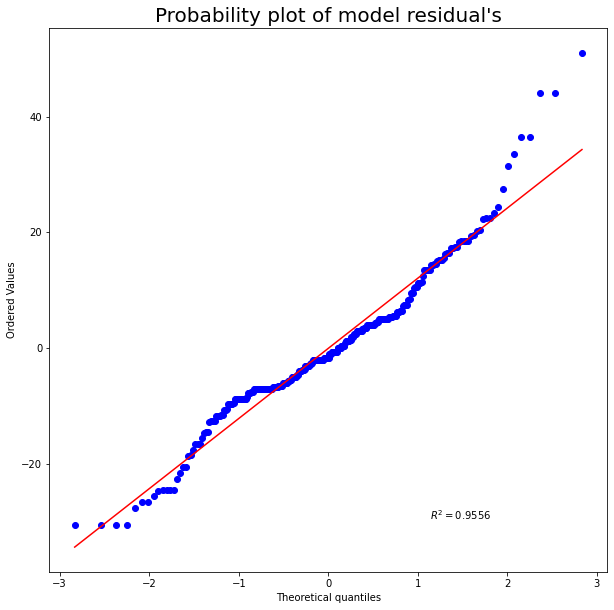

In [109]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [110]:
#Critical values of the normal PPCC for testing if data come from a normal distribution
>>> import webbrowser
>>> webbrowser.open('https://www.itl.nist.gov/div898/handbook/eda/section3/eda3676.htm')
True

True

 <div class="alert alert-block alert-info">
Le coefficient de corrélation du diagramme de probabilité (PPCC) indiquait la non-normalité. Étant donné que la taille de l’échantillon N = 300, le PPCC calculé, = 0,9557, est plus petit que le PPC du tableau, =0.9952.<br> 
Le QQplot met en évidence un défaut de normalité, tout comme le test de Shapiro Wilk qui rejette l'hypothèse de normalité (la pvalue est < 0.05).<br> 
Il est évident d’affirmer que cette hypothèse n'est pas remplie.
    
</div>


### 8- L'ANOVA non paramétrique (test de Kruskal Wallis)

In [111]:
group1 = df_subset_categ0['age'].sample(7)
group2 = df_subset_categ1['age'].sample(7)
group3 = df_subset_categ2['age'].sample(7)
#perform Kruskal-Wallis Test 
stats.kruskal(group1, group2, group3)


KruskalResult(statistic=7.986589681504939, pvalue=0.018438860813856255)

### Critical Values of the Kruskal-Wallis H Distribution

<div style="float:left;"><img src="files/Kruskal_Wallis.png" alt="alt text" title="image Title" width="500"/></div>

 <div class="alert alert-block alert-info">
statistic=11.672564723412192 >> 5.819.<br>
La pvalue du test étant inférieure à 0.05, l’hypothèse de l’égalité des moyennes est rejetée. On conclut donc que les moyennes des trois groupes sont globalement différentes.<br>
Ainsi les variables 'categ' et 'age' ne sont pas independantes.<br>    
</div>


### <a name="C14">4.Le lien entre l’âge des clients et la taille du panier moyen </a>

 Le calcul du panier moyen peut être effectué sur plusieurs périodes, à savoir une journée, une semaine, un mois ou même une année.<br>
Le panier moyen d’un point de vente se calcule sur la base de la formule suivante :<br>
 <b>Chiffre d’affaires/Nombre de clients sur une période donnée.</b><br>
Le panier moyen peut être calculé pour un consommateur, mais également pour une catégorie de consommateurs (genre, tranche d’âge, catégorie socioprofessionnelle…). 

### 1.Calcul du panier moyen mensuel :

##### 1.1 Méthode(1)

In [112]:
age_mean = df_B_to_C.groupby(['age','month','Year'])['price'].mean()
age_mean =age_mean.reset_index().rename(columns = {'price':'panier_moyen'})
age_mean

,age,month,Year,panier_moyen
0,18,1,2022,36.007108
1,18,1,2023,43.520813
2,18,2,2022,41.083685
3,18,2,2023,38.710332
4,18,3,2021,37.236376
...,...,...,...,...
1819,93,10,2022,20.711000
1820,93,11,2021,13.202500
1821,93,11,2022,12.924000
1822,93,12,2021,16.790000


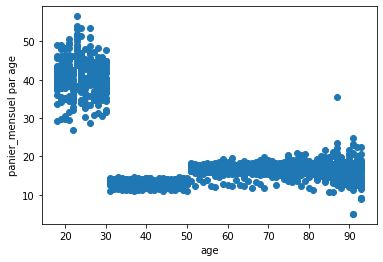

In [113]:
# Le diagramme de dispersion
plt.plot(age_mean["age"],age_mean["panier_moyen"],'o')
plt.xlabel("age")
plt.ylabel("panier_mensuel par age")
plt.show()

##### 1.2 Méthode(2)

In [114]:
# Scission des données:
nombre_client = df_B_to_C .groupby(['month','Year','age'])
# Clacul du nombre des clients par Year, month et age
nombre_client = nombre_client['client_id'].agg([pd.Series.count])
nombre_client = nombre_client.reset_index().rename(columns = {'count':'nb_client'})
nombre_client

,month,Year,age,nb_client
0,1,2022,18,695
1,1,2022,19,191
2,1,2022,20,182
3,1,2022,21,177
4,1,2022,22,226
...,...,...,...,...
1819,12,2022,89,21
1820,12,2022,90,10
1821,12,2022,91,8
1822,12,2022,92,13


In [115]:
# Scission des données:
CA_month = df_B_to_C .groupby(['month','Year','age'])
# Chiffre d'affaires par Year,month et age
CA_month = CA_month['price'].agg([pd.Series.sum])
CA_month = CA_month.reset_index().rename(columns = {'sum':'CA'})
CA_month

,month,Year,age,CA
0,1,2022,18,25024.94
1,1,2022,19,7235.17
2,1,2022,20,6901.84
3,1,2022,21,7047.95
4,1,2022,22,7842.64
...,...,...,...,...
1819,12,2022,89,346.85
1820,12,2022,90,127.53
1821,12,2022,91,140.97
1822,12,2022,92,247.97


In [116]:
# Jointure interne
df_panier_moyen = pd.merge(CA_month, nombre_client, on = ['month', 'Year','age'], how = 'inner')
# Ajouter une colonne panier_mensuel
df_panier_moyen['panier_mensuel'] = df_panier_moyen['CA'] / df_panier_moyen['nb_client']
# Affichage
df_panier_moyen

,month,Year,age,CA,nb_client,panier_mensuel
0,1,2022,18,25024.94,695,36.007108
1,1,2022,19,7235.17,191,37.880471
2,1,2022,20,6901.84,182,37.922198
3,1,2022,21,7047.95,177,39.818927
4,1,2022,22,7842.64,226,34.701947
...,...,...,...,...,...,...
1819,12,2022,89,346.85,21,16.516667
1820,12,2022,90,127.53,10,12.753000
1821,12,2022,91,140.97,8,17.621250
1822,12,2022,92,247.97,13,19.074615


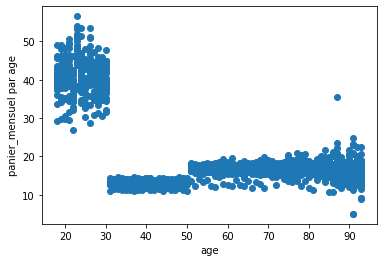

In [117]:
# Le diagramme de dispersion
plt.plot(df_panier_moyen["age"],df_panier_moyen["panier_mensuel"],'o')
plt.xlabel("age")
plt.ylabel("panier_mensuel par age")
plt.show()

On constate qu'on a une relation de variation en escalier ou par paliers(le panier_mensuel varie de façon constante par morceaux). Il s’agit donc d’une combinaison de relations de variation nulle et d’une relation qui caractérise les créneaux (les sauts entre les paliers).
On va étudier la variation du panier_mensuel en fonction de trois tranches d'âge (jeune, adultes et agees).


### 2-Visualisation de l'influence en affichant les boîtes à moustaches 

In [118]:
# Ajouter une colonne 'tranche_age'
liste = []
for age in df_panier_moyen['age']:
    if age < 30:
        liste.append('jeune') 
    if 30 <= age <50:
        liste.append('adultes')
    if  age >= 50:
        liste.append('agees')
        
df_panier_moyen['tranche_age'] = liste
df_panier_moyen.head()

,month,Year,age,CA,nb_client,panier_mensuel,tranche_age
0,1,2022,18,25024.94,695,36.007108,jeune
1,1,2022,19,7235.17,191,37.880471,jeune
2,1,2022,20,6901.84,182,37.922198,jeune
3,1,2022,21,7047.95,177,39.818927,jeune
4,1,2022,22,7842.64,226,34.701947,jeune


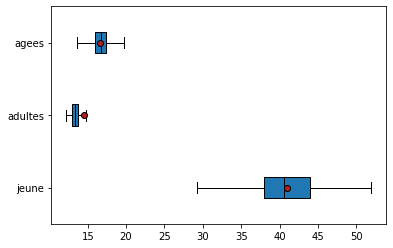

In [119]:
# Les boîtes à moustaches
X = "tranche_age" # qualitative
Y = "panier_mensuel" # quantitative
modalites = df_panier_moyen['tranche_age'].unique()
groupes = []
for m in modalites:
    groupes.append(df_panier_moyen[df_panier_moyen['tranche_age'] == m][Y])

# Propriétés graphiques    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes,labels = modalites,  showfliers = False, medianprops = medianprops, 
            vert = False, patch_artist = True, showmeans=True, meanprops = meanprops)
plt.show()

Il semble qu'il y ait des différences distinctes entre les trois groupes. Effectuons donc un test ANOVA pour prouver si c'est le cas.<br>
Les boxplots de certains groupes étant plus étendus que d’autres, cela laisse penser que les résidus ne seront probablement pas homogènes. De plus, la présence d’outliers dans les groupes laisse également envisager un défaut de normalité des résidus

### 3- Calcul de rapport de corrélation

In [120]:
 # Un indicateur de liaison : le rapport de corrélation
X = "tranche_age" # qualitative
Y = "panier_mensuel" # quantitative


def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df_panier_moyen['tranche_age'],df_panier_moyen['panier_mensuel'])

0.8476319211064948

### 4.ONE-WAY ANOVA 

#### 4.1. Définir les hypothèses :
hypothèse nulle : il n'y a pas de différence entre les trois groupes (toutes les moyennes sont égales)<br> 
hypothèse alternative : il y a différence entre au moins deux groupes (toutes les moyennes ne sont pas égales)<br>

#### 4.2. Créez le sous-échantillon :
On fait un plan d'expérience complet( ∀i∈{1,…,3}:ni>0) et équilibré (n1=n2=n3=100)  :

In [121]:
subset_jeune = df_panier_moyen[df_panier_moyen['tranche_age'] == 'jeune']
subset_jeune = subset_jeune.sample(n=50)
subset_jeune.head()

,month,Year,age,CA,nb_client,panier_mensuel,tranche_age
1679,12,2021,25,5794.30,192,30.178646,jeune
1606,11,2022,28,7839.71,225,34.843156,jeune
1452,10,2022,26,10554.45,257,41.067899,jeune
1748,12,2022,18,26430.03,629,42.019126,jeune
1293,9,2022,19,6601.10,150,44.007333,jeune


In [122]:
subset_adulte = df_panier_moyen[df_panier_moyen['tranche_age'] == 'adultes']
subset_adulte = subset_adulte.sample(n=50)
subset_adulte.head()

,month,Year,age,CA,nb_client,panier_mensuel,tranche_age
1465,10,2022,39,11959.458188,895,13.362523,adultes
704,5,2022,38,12343.808188,937,13.173755,adultes
164,2,2022,30,8492.250000,227,37.410793,adultes
548,4,2022,34,14146.180000,1030,13.734155,adultes
549,4,2022,35,9518.736376,734,12.968306,adultes


In [123]:
subset_agee = df_panier_moyen[df_panier_moyen['tranche_age'] == 'agees']
subset_agee = subset_agee.sample(n=50)
subset_agee.head()

,month,Year,age,CA,nb_client,panier_mensuel,tranche_age
756,5,2022,90,115.30,7,16.471429,agees
648,5,2021,58,5885.60,359,16.394429,agees
1336,9,2022,62,5137.10,300,17.123667,agees
1354,9,2022,80,2111.13,122,17.304344,agees
586,4,2022,72,2308.64,134,17.228657,agees


In [124]:
subset_tranche_age = pd.concat([subset_jeune, subset_adulte, subset_agee])
subset_tranche_age.head()

,month,Year,age,CA,nb_client,panier_mensuel,tranche_age
1679,12,2021,25,5794.30,192,30.178646,jeune
1606,11,2022,28,7839.71,225,34.843156,jeune
1452,10,2022,26,10554.45,257,41.067899,jeune
1748,12,2022,18,26430.03,629,42.019126,jeune
1293,9,2022,19,6601.10,150,44.007333,jeune


#### 4.3.Teste ONE-WAY ANOVA 

In [125]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('panier_mensuel ~ C(tranche_age)', data = subset_tranche_age).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(tranche_age),23690.403500,2.0,538.289509,2.274419e-68
Residual,3234.773535,147.0,NaN,NaN


F = 357.255762 >> 1 la variabilité entre les moyens de groupe est plus grande que la variabilité des observations à l’intérieur des groupes. Il existe une différence statistiquement significative entre les groupes p-value = 3.598603e-57 << 0.05

#### 4.4.Vérification des hypothèses

Les hypothèses doivent être satisfaites pour que les résultats des tests soient considérés comme valides.

INDÉPENDANCE<br> 
Cette hypothèse signifie que tous les groupes sont mutuellement exclusifs, c'est-à-dire qu'un individu ne peut appartenir qu'à un seul groupe. <br> 
NORMALITÉ<br> 
L'hypothèse de normalité est testée sur les résidus du modèle lorsqu'il provient d'un cadre d'ANOVA ou de régression. Une méthode pour tester l'hypothèse de normalité est le test de Shapiro-Wilk. Cela peut être complété en utilisant la méthode shapiro() de scipy.stats.<br>
HOMOCEDASTICITE<br>
Ce terme signifie « égalité des variances des sous-populations ». La variance est une statistique de variabilité et de dispersion, et augmente d'autant plus la variabilité ou la dispersion des scores.
L'hypothèse d'homoscédasticité est vérifiée à l'aide du test de Levene ou de Bartlett.

In [126]:
#hypothèse nulle : La distribution des résidus est normale
#hypothèse alternative : les résidus ne sont pas distribués normalement.

import scipy.stats as stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.7771042585372925, pvalue=7.877648322074729e-14)

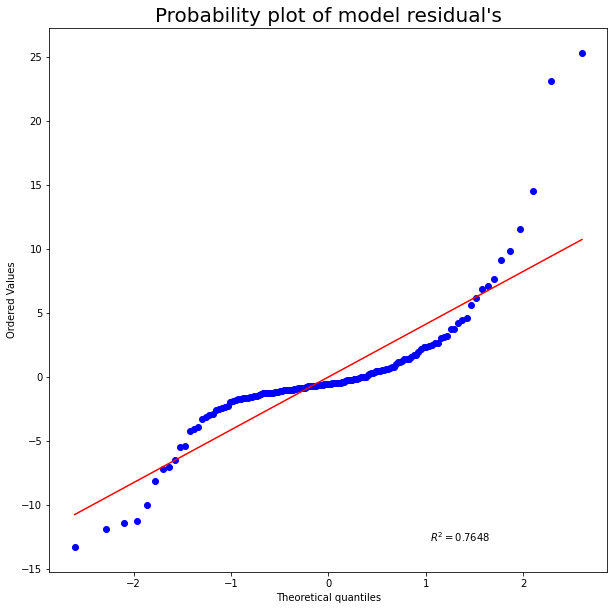

In [127]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [128]:
#Critical values of the normal PPCC for testing if data come from a normal distribution
>>> import webbrowser
>>> webbrowser.open('https://www.itl.nist.gov/div898/handbook/eda/section3/eda3676.htm')
True

True

 <div class="alert alert-block alert-info">
Le coefficient de corrélation du diagramme de probabilité (PPCC) indiquait la non-normalité. Étant donné que la taille de l’échantillon N = 150, le PPCC calculé, = 0.6016, est plus petit que le PPC du tableau, = 0.9909.<br> 
Le QQplot met en évidence un défaut de normalité, tout comme le test de Shapiro Wilk qui rejette l'hypothèse de normalité (la pvalue est < 0.05).<br> 
Il est évident d’affirmer que cette hypothèse n'est pas remplie.
    
</div>

### 5. L'ANOVA non paramétrique (test de Kruskal Wallis)

In [129]:
group1 = subset_jeune['panier_mensuel'].sample(8)
group2 = subset_adulte['panier_mensuel'].sample(8)
group3 = subset_agee['panier_mensuel'].sample(8)
#perform Kruskal-Wallis Test 
stats.kruskal(group1, group2, group3)

KruskalResult(statistic=19.28, pvalue=6.507305474754292e-05)

La pvalue du test étant inférieure à 0.05, l’hypothèse de l’égalité des moyennes est rejetée. On conclut donc que les moyennes des trois groupes sont globalement différentes. Ainsi les variables 'panier_mensuel' et 'tranche_age' ne sont pas indépendantes

### <a name="C15">5. Le lien entre l’âge des clients et la fréquence d'achat </a>

####  Etape(1): Les données à étudier

La fréquence d'achat correspond au nombre d’achats réalisé par un client (ou une catégorie de client) sur une période donnée. 

In [130]:
# Scission des données  age':
age_frequence = df_B_to_C .groupby(['age'])

# Nombre de transactions par age
age_frequence = age_frequence['price'].agg([pd.Series.count])
                                                    
age_frequence = age_frequence.reset_index()
# Calcul de la fréquence d'achat
age_frequence['frequence'] = age_frequence['count'] / age_frequence['count'].sum() 
age_frequence

,age,count,frequence
0,18,15149,0.022308
1,19,4371,0.006437
2,20,4587,0.006755
3,21,4252,0.006261
4,22,4415,0.006502
...,...,...,...
71,89,327,0.000482
72,90,311,0.000458
73,91,170,0.000250
74,92,226,0.000333


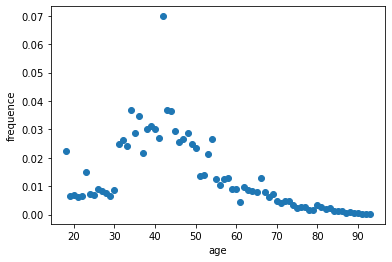

In [131]:
# Le diagramme de dispersion
plt.plot(age_frequence["age"],age_frequence["frequence"],'o')
plt.xlabel("age")
plt.ylabel("frequence")
plt.show()

<AxesSubplot:>

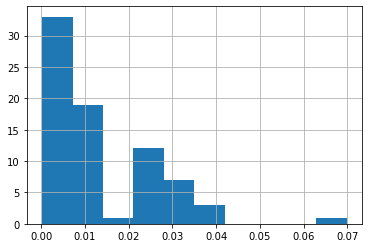

In [132]:
age_frequence["frequence"].hist()

### Etape(2): Test de normalité 
hypothèse nulle H0: l’échantillon est issu d’une population normalement distribuée.<br>
hypothèse nulle H1 l’échantillon n'est pas issu d’une population normalement distribuée.<br>

In [133]:
# Créer un sous-échantillon
echantillon = age_frequence.sample(50)
#perform Shapiro-Wilk test
shapiro(echantillon["frequence"])

ShapiroResult(statistic=0.8863351345062256, pvalue=0.00017520139226689935)

Wobs < W0.05; pvalue << 0.05 on rejette l'hypothèse nulle.

La distribution de la variable fréquence n'est pas gaussienne , et la relation entre les variables ne semble pas être affine. On a fait le choix de faire un test de corrélation non paramétrique (test de Spearman). La corrélation de Spearman est étudiée lorsque deux variables statistiques semblent être corrélées sans que la relation entre les deux variables soit de type affine.

### Etape(3): Test de corrélation de Spearman 

In [135]:
from scipy.stats import spearmanr
#extract Spearman Rank correlation coefficient
coeff = spearmanr(age_frequence['age'], age_frequence['frequence'])[0]
print('Le coefficient de Spearman est:', coeff)

Le coefficient de Spearman est: -0.6846206425153794


In [136]:

#extract p-value of Spearman Rank correlation coefficient
p_value = spearmanr(age_frequence['age'], age_frequence['frequence'])[1] 
print('La p-valeur est',p_value)

La p-valeur est 9.152883867240306e-12


<div class="alert alert-block alert-info">
La p-valeur est inférieur à 5%. On en déduit que les variables ne sont pas indépendantes.<br> 
Le coefficient de Spearman permet de mesurer le niveau de corrélation entre les deux variables. Il renvoie une valeur entre -1 et 1. S’il est proche de 1 cela signifie que les variables sont corrélées, proche de 0 que les variables sont décorrélées et proche de -1 qu’elles sont corrélées négativement.<br> 
Dans notre exemple, le coefficient a une valeur de -0.684 ce qui signifie que les variables sont corrélées négativement.</div>  